<a href="https://colab.research.google.com/github/NarayaniSuresh/CSE340/blob/main/Bitcoin_Price_Prediction_CA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

In [ ]:
!pip install yfinance

In [ ]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# DATA PREPARATION

In [ ]:
data = pd.read_csv('crypto_data_updated_13_november.csv')

In [ ]:
#btc - bitcoin
#eth - ethereum
#usdt - tether (USD is a physical currency that the US goverment issues and backs,where USDT is a digital currency)
#bnb - binance

In [ ]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [ ]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [ ]:
data.head()

Close (BTC)  Volume (BTC)  Close (ETH)  \
Date                                                                
2019-01-17 00:00:00+00:00  3678.563965    5464420383   123.741920   
2019-01-18 00:00:00+00:00  3657.839355    5002961727   121.010262   
2019-01-19 00:00:00+00:00  3728.568359    5955691380   124.519020   
2019-01-20 00:00:00+00:00  3601.013672    5582489560   119.474831   
2019-01-21 00:00:00+00:00  3576.032471    5004347059   117.157852   

                           Volume (ETH)  Close (USDT)  Volume (USDT)  \
Date                                                                   
2019-01-17 00:00:00+00:00    2594091285      1.017495     4146824182   
2019-01-18 00:00:00+00:00    2305389800      1.017251     3661299223   
2019-01-19 00:00:00+00:00    3048261797      1.016782     3961648844   
2019-01-20 00:00:00+00:00    2964108269      1.017146     4389435191   
2019-01-21 00:00:00+00:00    2421720343      1.013376     3497758658   

                           Close (BNB)  Volume (BNB)  
Date                                                  
2019-01-17 00:00:00+00:00     6.417832      36306127  
2019-01-18 00:00:00+00:00     6.563040      43105423  
2019-01-19 00:00:00+00:00     6.635449      46981638  
2019-01-20 00:00:00+00:00     6.493869      49479090  
2019-01-21 00:00:00+00:00     6.553025      36321046

In [ ]:
data.tail()

Close (BTC)  Volume (BTC)  Close (ETH)  \
Date                                                                 
2024-01-13 00:00:00+00:00  42842.382812   20601860469  2576.597900   
2024-01-14 00:00:00+00:00  41796.269531   17521429522  2472.241211   
2024-01-15 00:00:00+00:00  42511.968750   22320220558  2511.363770   
2024-01-16 00:00:00+00:00  43154.945312   24062872740  2587.691162   
2024-01-17 00:00:00+00:00  42574.605469   24365785088  2538.193848   

                           Volume (ETH)  Close (USDT)  Volume (USDT)  \
Date                                                                   
2024-01-13 00:00:00+00:00   12250316867      0.999976    38741665180   
2024-01-14 00:00:00+00:00    9405587417      0.999490    35054633394   
2024-01-15 00:00:00+00:00    9700630000      0.999723    41325317168   
2024-01-16 00:00:00+00:00   11063317095      0.999869    43063894677   
2024-01-17 00:00:00+00:00   11532236800      0.999543    43096973312   

                           Close (BNB)  Volume (BNB)  
Date                                                  
2024-01-13 00:00:00+00:00   302.227295     816347256  
2024-01-14 00:00:00+00:00   299.051331     787643004  
2024-01-15 00:00:00+00:00   317.567261    1667214322  
2024-01-16 00:00:00+00:00   315.226257    1143877764  
2024-01-17 00:00:00+00:00   313.276947    1177285760

In [ ]:
data.to_csv('crypto prices.csv')

In [ ]:
data.shape

(1827, 8)

In [ ]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [ ]:
data

Close (BTC)  Volume (BTC)  Close (ETH)  \
Date                                                                 
2019-01-17 00:00:00+00:00   3678.563965    5464420383   123.741920   
2019-01-18 00:00:00+00:00   3657.839355    5002961727   121.010262   
2019-01-19 00:00:00+00:00   3728.568359    5955691380   124.519020   
2019-01-20 00:00:00+00:00   3601.013672    5582489560   119.474831   
2019-01-21 00:00:00+00:00   3576.032471    5004347059   117.157852   
...                                 ...           ...          ...   
2024-01-12 00:00:00+00:00  42853.167969   43332698900  2524.460205   
2024-01-13 00:00:00+00:00  42842.382812   20601860469  2576.597900   
2024-01-14 00:00:00+00:00  41796.269531   17521429522  2472.241211   
2024-01-15 00:00:00+00:00  42511.968750   22320220558  2511.363770   
2024-01-16 00:00:00+00:00  43154.945312   24062872740  2587.691162   

                           Volume (ETH)  Close (USDT)  Volume (USDT)  \
Date                                                                   
2019-01-17 00:00:00+00:00    2594091285      1.017495     4146824182   
2019-01-18 00:00:00+00:00    2305389800      1.017251     3661299223   
2019-01-19 00:00:00+00:00    3048261797      1.016782     3961648844   
2019-01-20 00:00:00+00:00    2964108269      1.017146     4389435191   
2019-01-21 00:00:00+00:00    2421720343      1.013376     3497758658   
...                                 ...           ...            ...   
2024-01-12 00:00:00+00:00   23623839263      0.999909    71993899911   
2024-01-13 00:00:00+00:00   12250316867      0.999976    38741665180   
2024-01-14 00:00:00+00:00    9405587417      0.999490    35054633394   
2024-01-15 00:00:00+00:00    9700630000      0.999723    41325317168   
2024-01-16 00:00:00+00:00   11063317095      0.999869    43063894677   

                           Close (BNB)  Volume (BNB)  
Date                                                  
2019-01-17 00:00:00+00:00     6.417832      36306127  
2019-01-18 00:00:00+00:00     6.563040      43105423  
2019-01-19 00:00:00+00:00     6.635449      46981638  
2019-01-20 00:00:00+00:00     6.493869      49479090  
2019-01-21 00:00:00+00:00     6.553025      36321046  
...                                ...           ...  
2024-01-12 00:00:00+00:00   296.630463    1198386629  
2024-01-13 00:00:00+00:00   302.227295     816347256  
2024-01-14 00:00:00+00:00   299.051331     787643004  
2024-01-15 00:00:00+00:00   317.567261    1667214322  
2024-01-16 00:00:00+00:00   315.226257    1143877764  

[1826 rows x 8 columns]

# Exploratory Data Analysis

# ***Statistical Analysis***

In [ ]:
data.shape


(1826, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-17 00:00:00+00:00 to 2024-01-16 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1826 non-null   float64
 1   Volume (BTC)   1826 non-null   int64  
 2   Close (ETH)    1826 non-null   float64
 3   Volume (ETH)   1826 non-null   int64  
 4   Close (USDT)   1826 non-null   float64
 5   Volume (USDT)  1826 non-null   int64  
 6   Close (BNB)    1826 non-null   float64
 7   Volume (BNB)   1826 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.4 KB


In [ ]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [ ]:
summary_stats = data.describe()
from tabulate import tabulate

# Convert the summary statistics DataFrame to a table
table = tabulate(summary_stats, headers='keys', tablefmt='fancy_grid', showindex=True)

# Display the table
print('Summary Statistics:')
print(table)


Summary Statistics:
╒═══════╤═══════════════╤════════════════╤═══════════════╤════════════════╤════════════════╤═════════════════╤═══════════════╤════════════════╕
│       │   Close (BTC) │   Volume (BTC) │   Close (ETH) │   Volume (ETH) │   Close (USDT) │   Volume (USDT) │   Close (BNB) │   Volume (BNB) │
╞═══════╪═══════════════╪════════════════╪═══════════════╪════════════════╪════════════════╪═════════════════╪═══════════════╪════════════════╡
│ count │       1826    │ 1826           │      1826     │ 1826           │  1826          │  1826           │    1826       │ 1826           │
├───────┼───────────────┼────────────────┼───────────────┼────────────────┼────────────────┼─────────────────┼───────────────┼────────────────┤
│ mean  │      24947.8  │    2.92696e+10 │      1429.28  │    1.43781e+10 │     1.0012     │     4.81413e+10 │     204.699   │    1.106e+09   │
├───────┼───────────────┼────────────────┼───────────────┼────────────────┼────────────────┼─────────────────┼──────

# ***Visualization Analysis***

<Axes: xlabel='Date'>

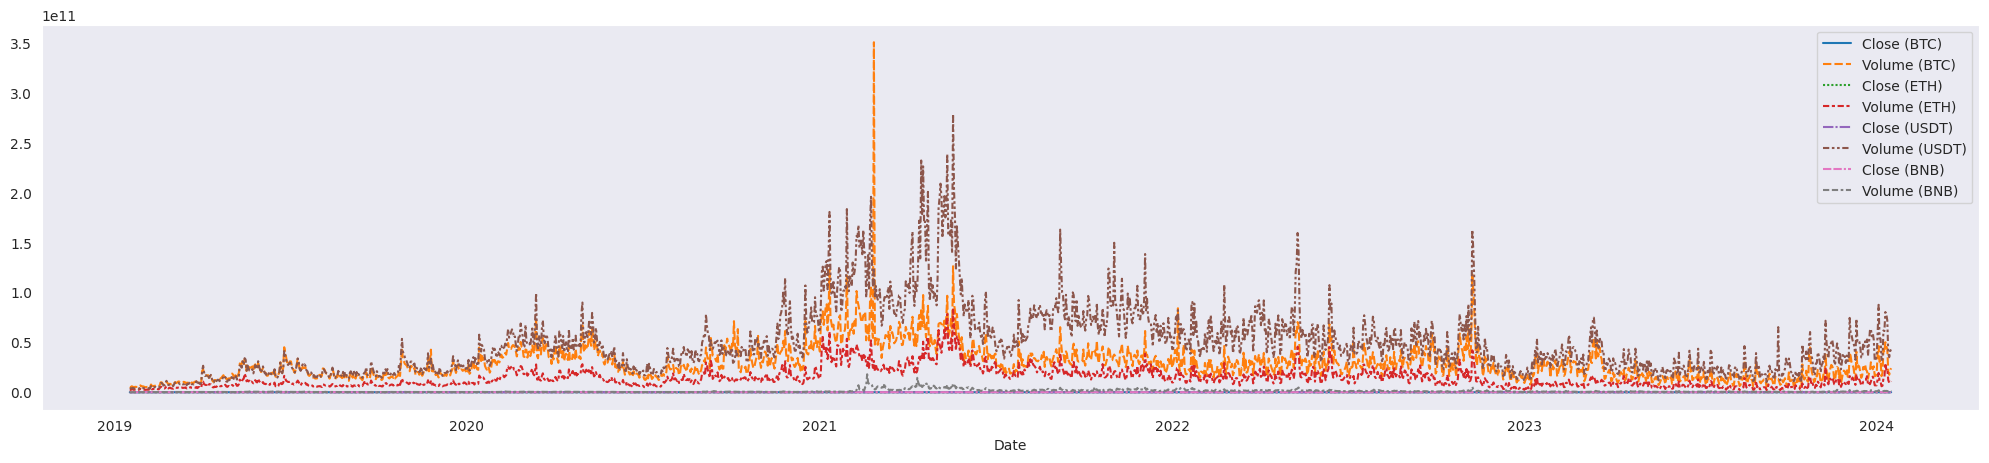

In [ ]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

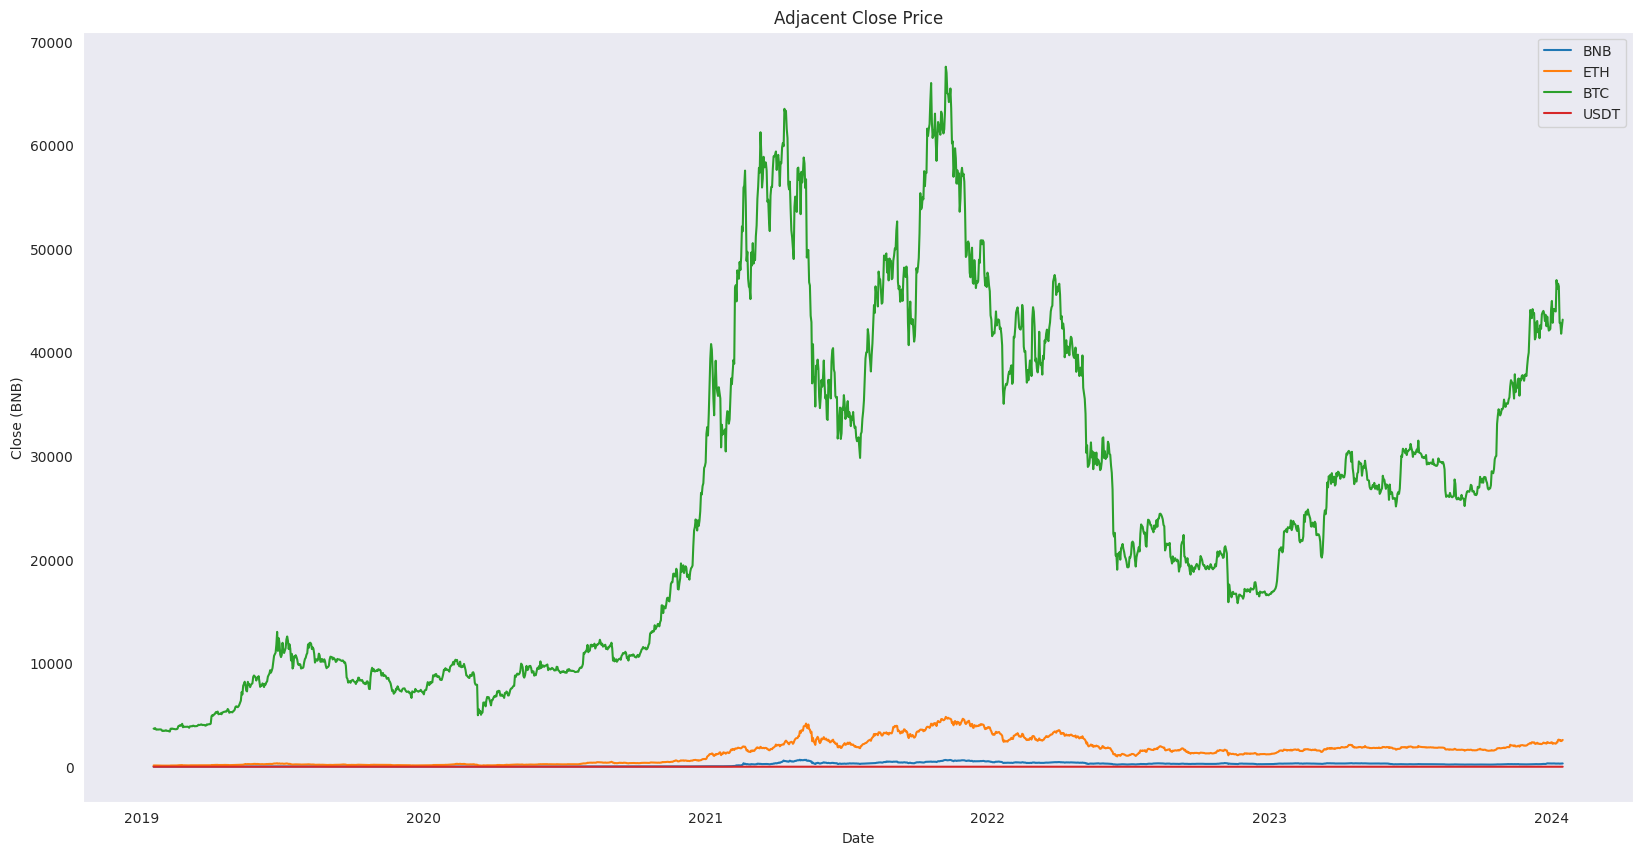

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

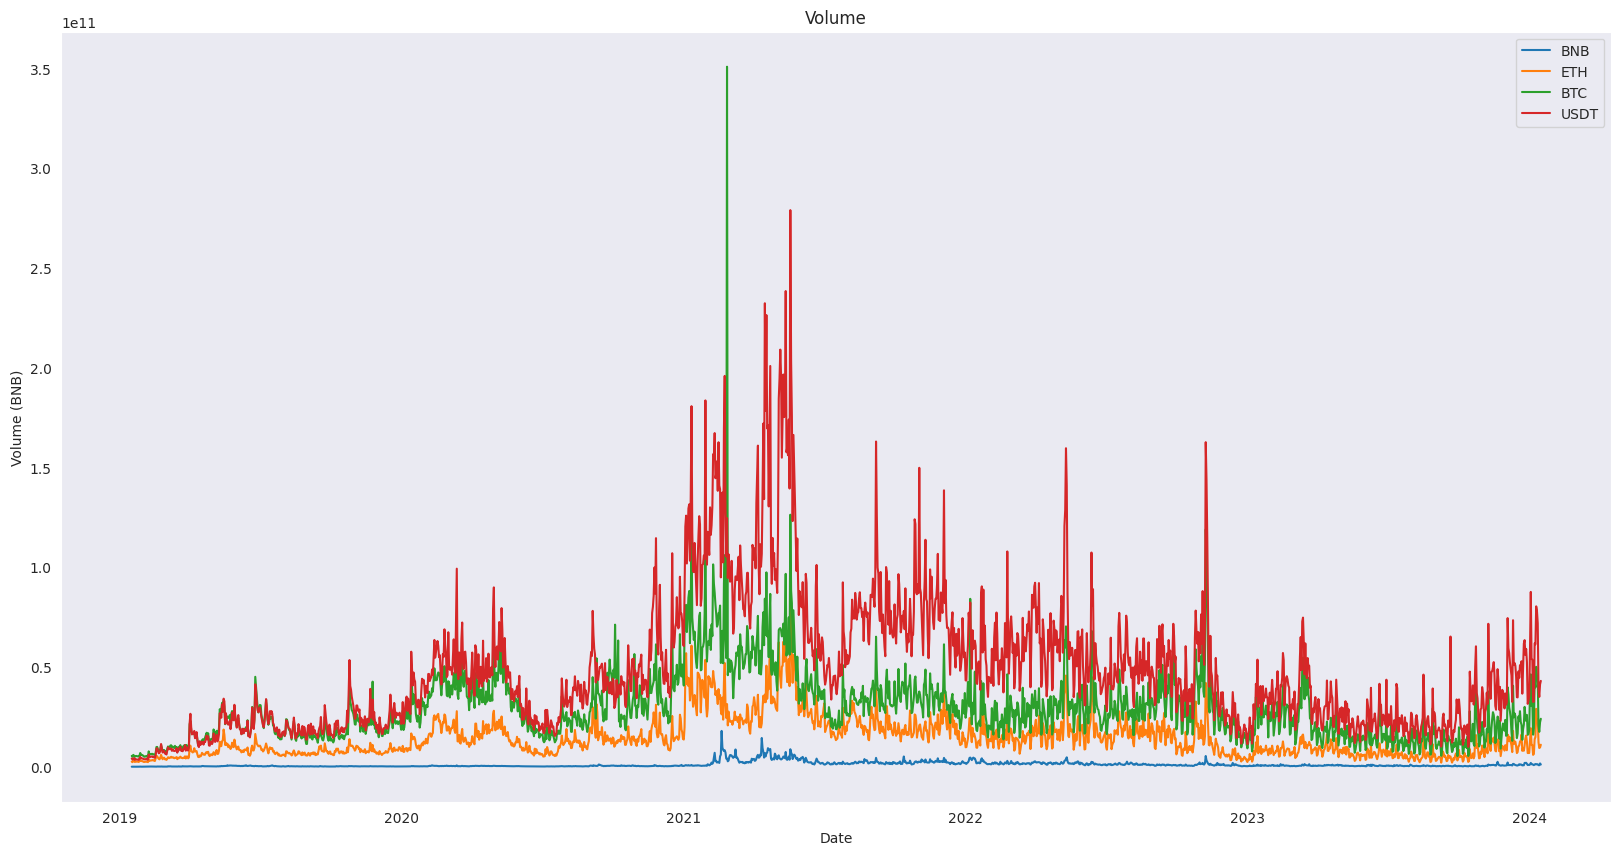

In [ ]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

In [ ]:
data_btc = data.loc[:,'Close (BTC)'].values
data_btc

array([ 3678.56396484,  3657.83935547,  3728.56835938, ...,
       41796.26953125, 42511.96875   , 43154.9453125 ])

In [ ]:
import plotly.graph_objects as go
from datetime import datetime

temp = yf.Ticker('BTC-USD')
data_btc = btc.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_btc.index,
                open=data_btc['Open'],
                high=data_btc['High'],
                low=data_btc['Low'],
                close=data_btc['Close'])])

fig.show()

In [ ]:
data_eth = data.loc[:,'Close (ETH)'].values
data_eth

array([ 123.74192047,  121.01026154,  124.51902008, ..., 2472.24121094,
       2511.36376953, 2587.69116211])

In [ ]:
import plotly.graph_objects as go
from datetime import datetime



temp = yf.Ticker('ETH-USD')
data_eth = temp.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_eth.index,
                open=data_eth['Open'],
                high=data_eth['High'],
                low=data_eth['Low'],
                close=data_eth['Close'],
                increasing_line_color='yellow',
                decreasing_line_color='blue',
                line=dict(width=1))])

fig.show()


In [ ]:
data_usdt = data.loc[:,'Close (USDT)'].values
data_usdt

array([1.01749504, 1.01725101, 1.01678205, ..., 0.99949002, 0.99972302,
       0.99986899])

In [ ]:
import plotly.graph_objects as go
from datetime import datetime

temp = yf.Ticker('USDT-USD')
data_usdt = usdt.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_usdt.index,
                open=data_usdt['Open'],
                high=data_usdt['High'],
                low=data_usdt['Low'],
                close=data_usdt['Close'],
                increasing_line_color='purple',
                decreasing_line_color='green',
                line=dict(width=1))])

fig.show()

In [ ]:
data_bnb = data.loc[:,'Close (BNB)'].values
data_bnb

array([  6.4178319 ,   6.56303978,   6.63544893, ..., 299.05133057,
       317.56726074, 315.22625732])

In [ ]:
import plotly.graph_objects as go
from datetime import datetime

temp = yf.Ticker('BNB-USD')
data_bnb = bnb.history(period='5y')

fig = go.Figure(data=[go.Candlestick(x=data_bnb.index,
                open=data_bnb['Open'],
                high=data_bnb['High'],
                low=data_bnb['Low'],
                close=data_bnb['Close'],
                increasing_line_color='brown',
                decreasing_line_color='green',
                line=dict(width=1))])

fig.show()

array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

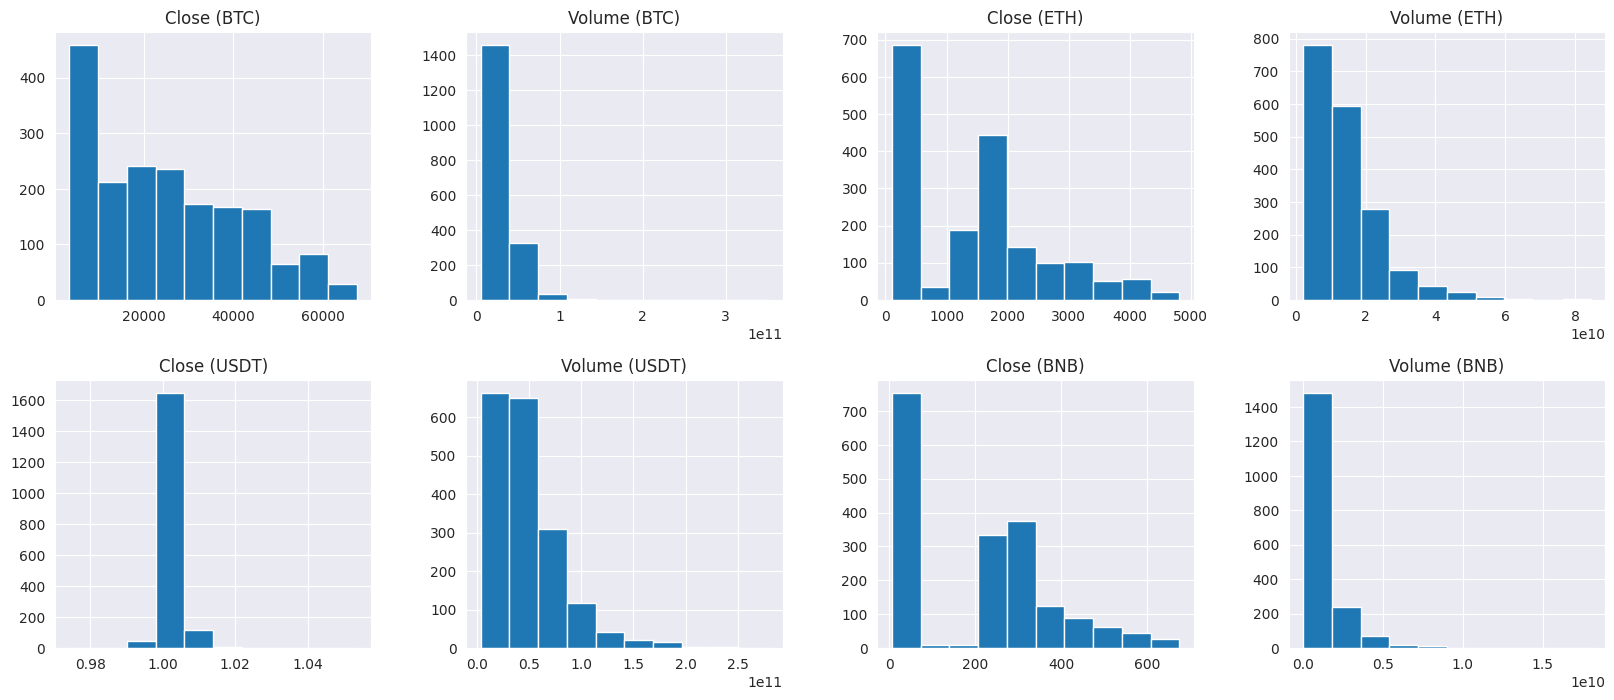

In [ ]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

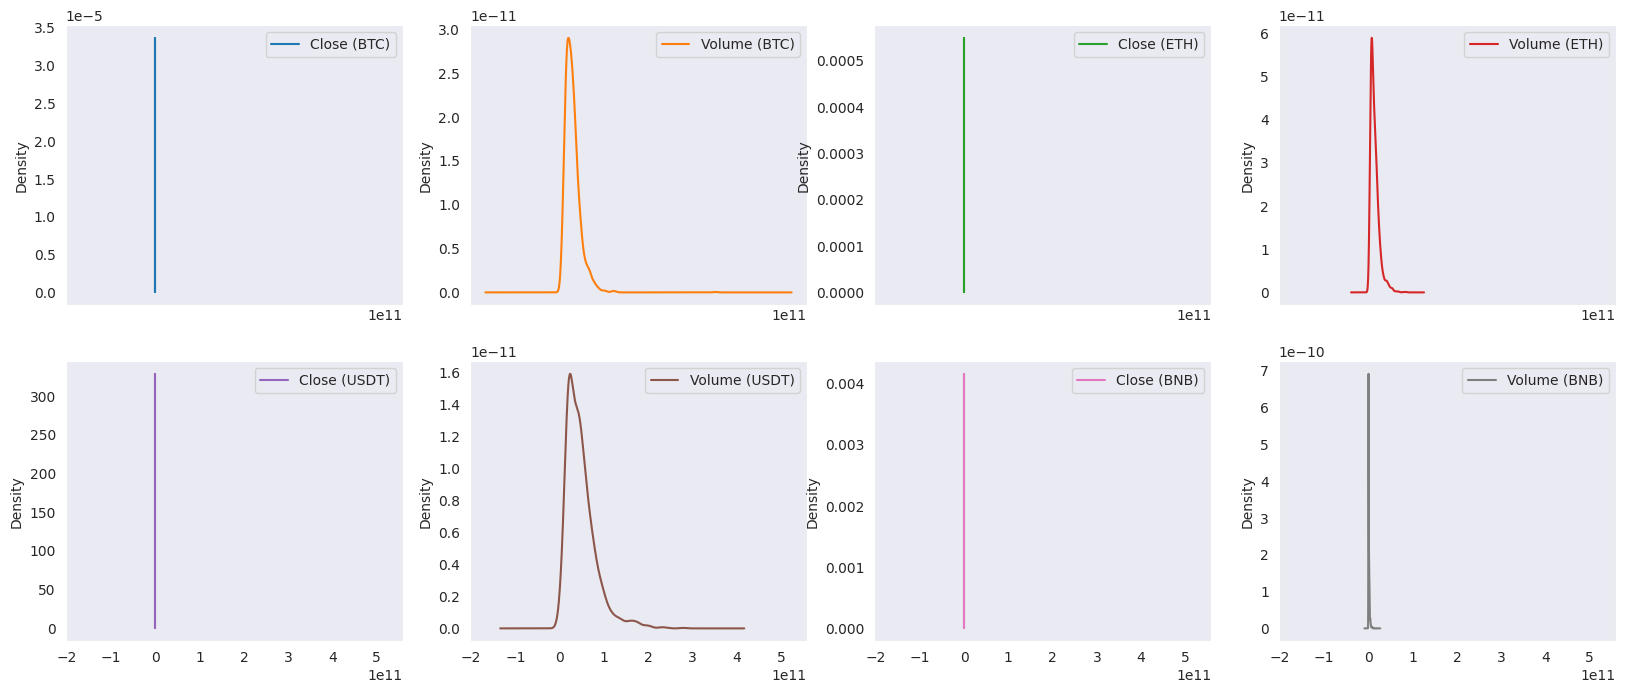

In [ ]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

#Checking for correlation

In [ ]:
data.corr()

Close (BTC)  Volume (BTC)  Close (ETH)  Volume (ETH)  \
Close (BTC)       1.000000      0.360881     0.918455      0.490367   
Volume (BTC)      0.360881      1.000000     0.192956      0.817189   
Close (ETH)       0.918455      0.192956     1.000000      0.375153   
Volume (ETH)      0.490367      0.817189     0.375153      1.000000   
Close (USDT)     -0.306744     -0.149960    -0.305328     -0.158007   
Volume (USDT)     0.638053      0.832442     0.500933      0.927591   
Close (BNB)       0.855077      0.169953     0.950526      0.328677   
Volume (BNB)      0.676894      0.543405     0.560866      0.659553   

               Close (USDT)  Volume (USDT)  Close (BNB)  Volume (BNB)  
Close (BTC)       -0.306744       0.638053     0.855077      0.676894  
Volume (BTC)      -0.149960       0.832442     0.169953      0.543405  
Close (ETH)       -0.305328       0.500933     0.950526      0.560866  
Volume (ETH)      -0.158007       0.927591     0.328677      0.659553  
Close (USDT)       1.000000      -0.197117    -0.314444     -0.167133  
Volume (USDT)     -0.197117       1.000000     0.462422      0.750608  
Close (BNB)       -0.314444       0.462422     1.000000      0.604577  
Volume (BNB)      -0.167133       0.750608     0.604577      1.000000

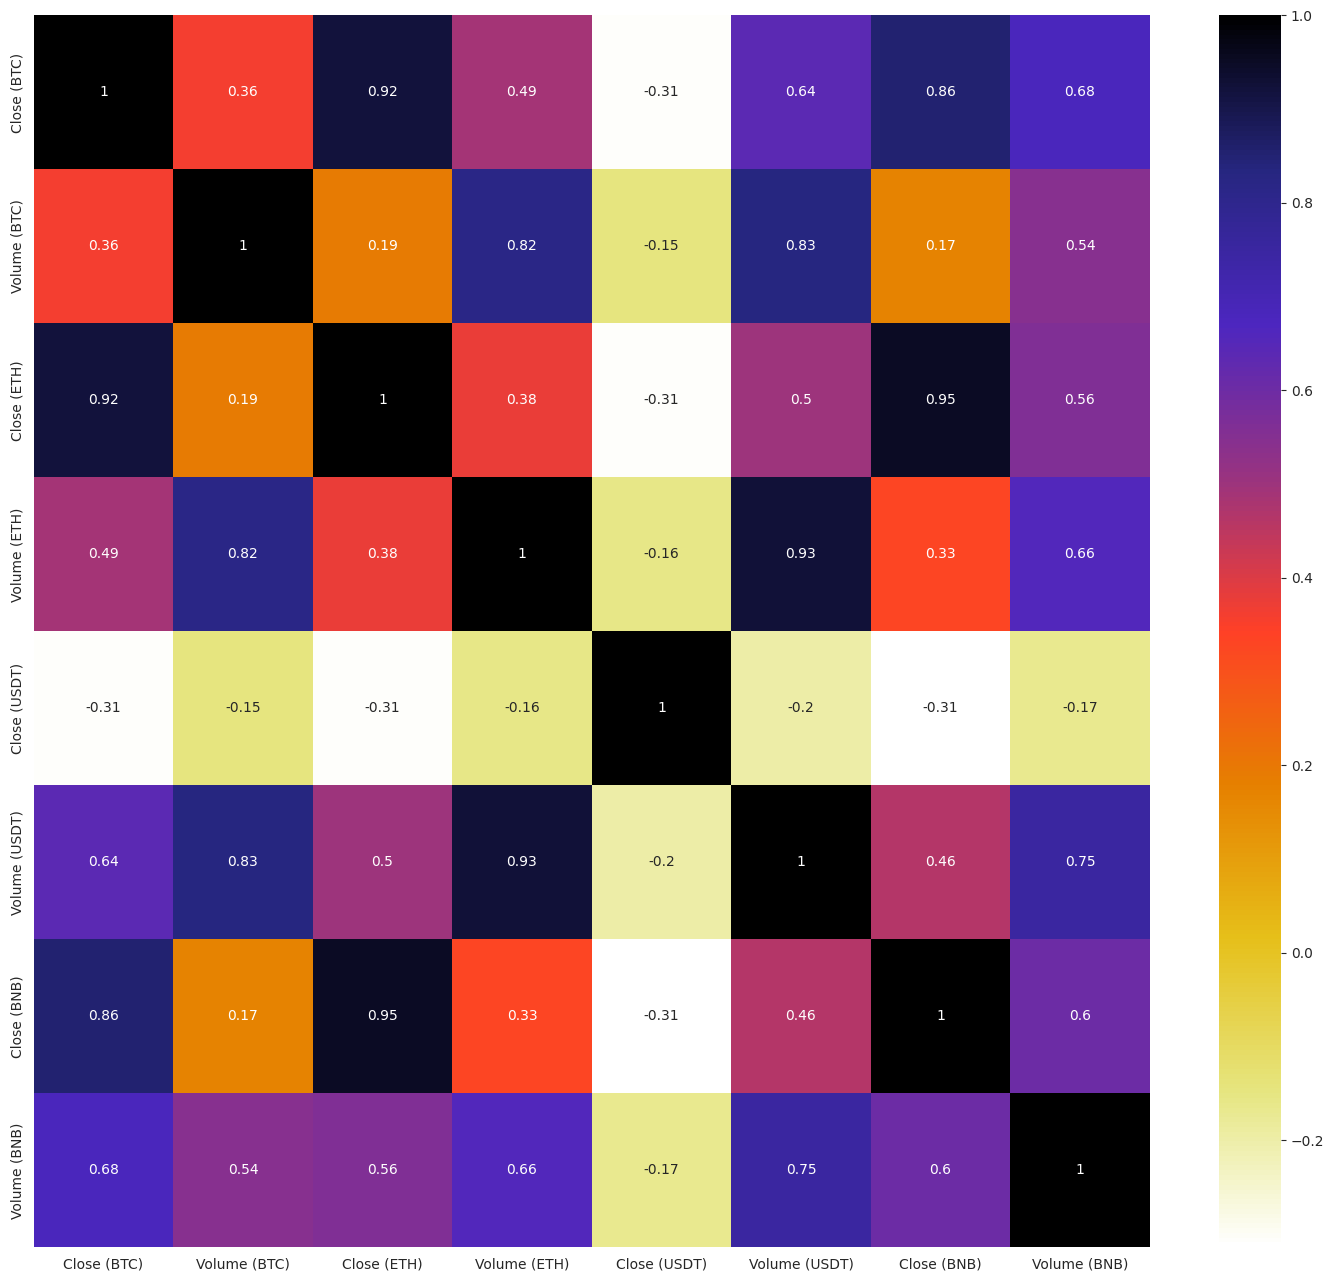

In [ ]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

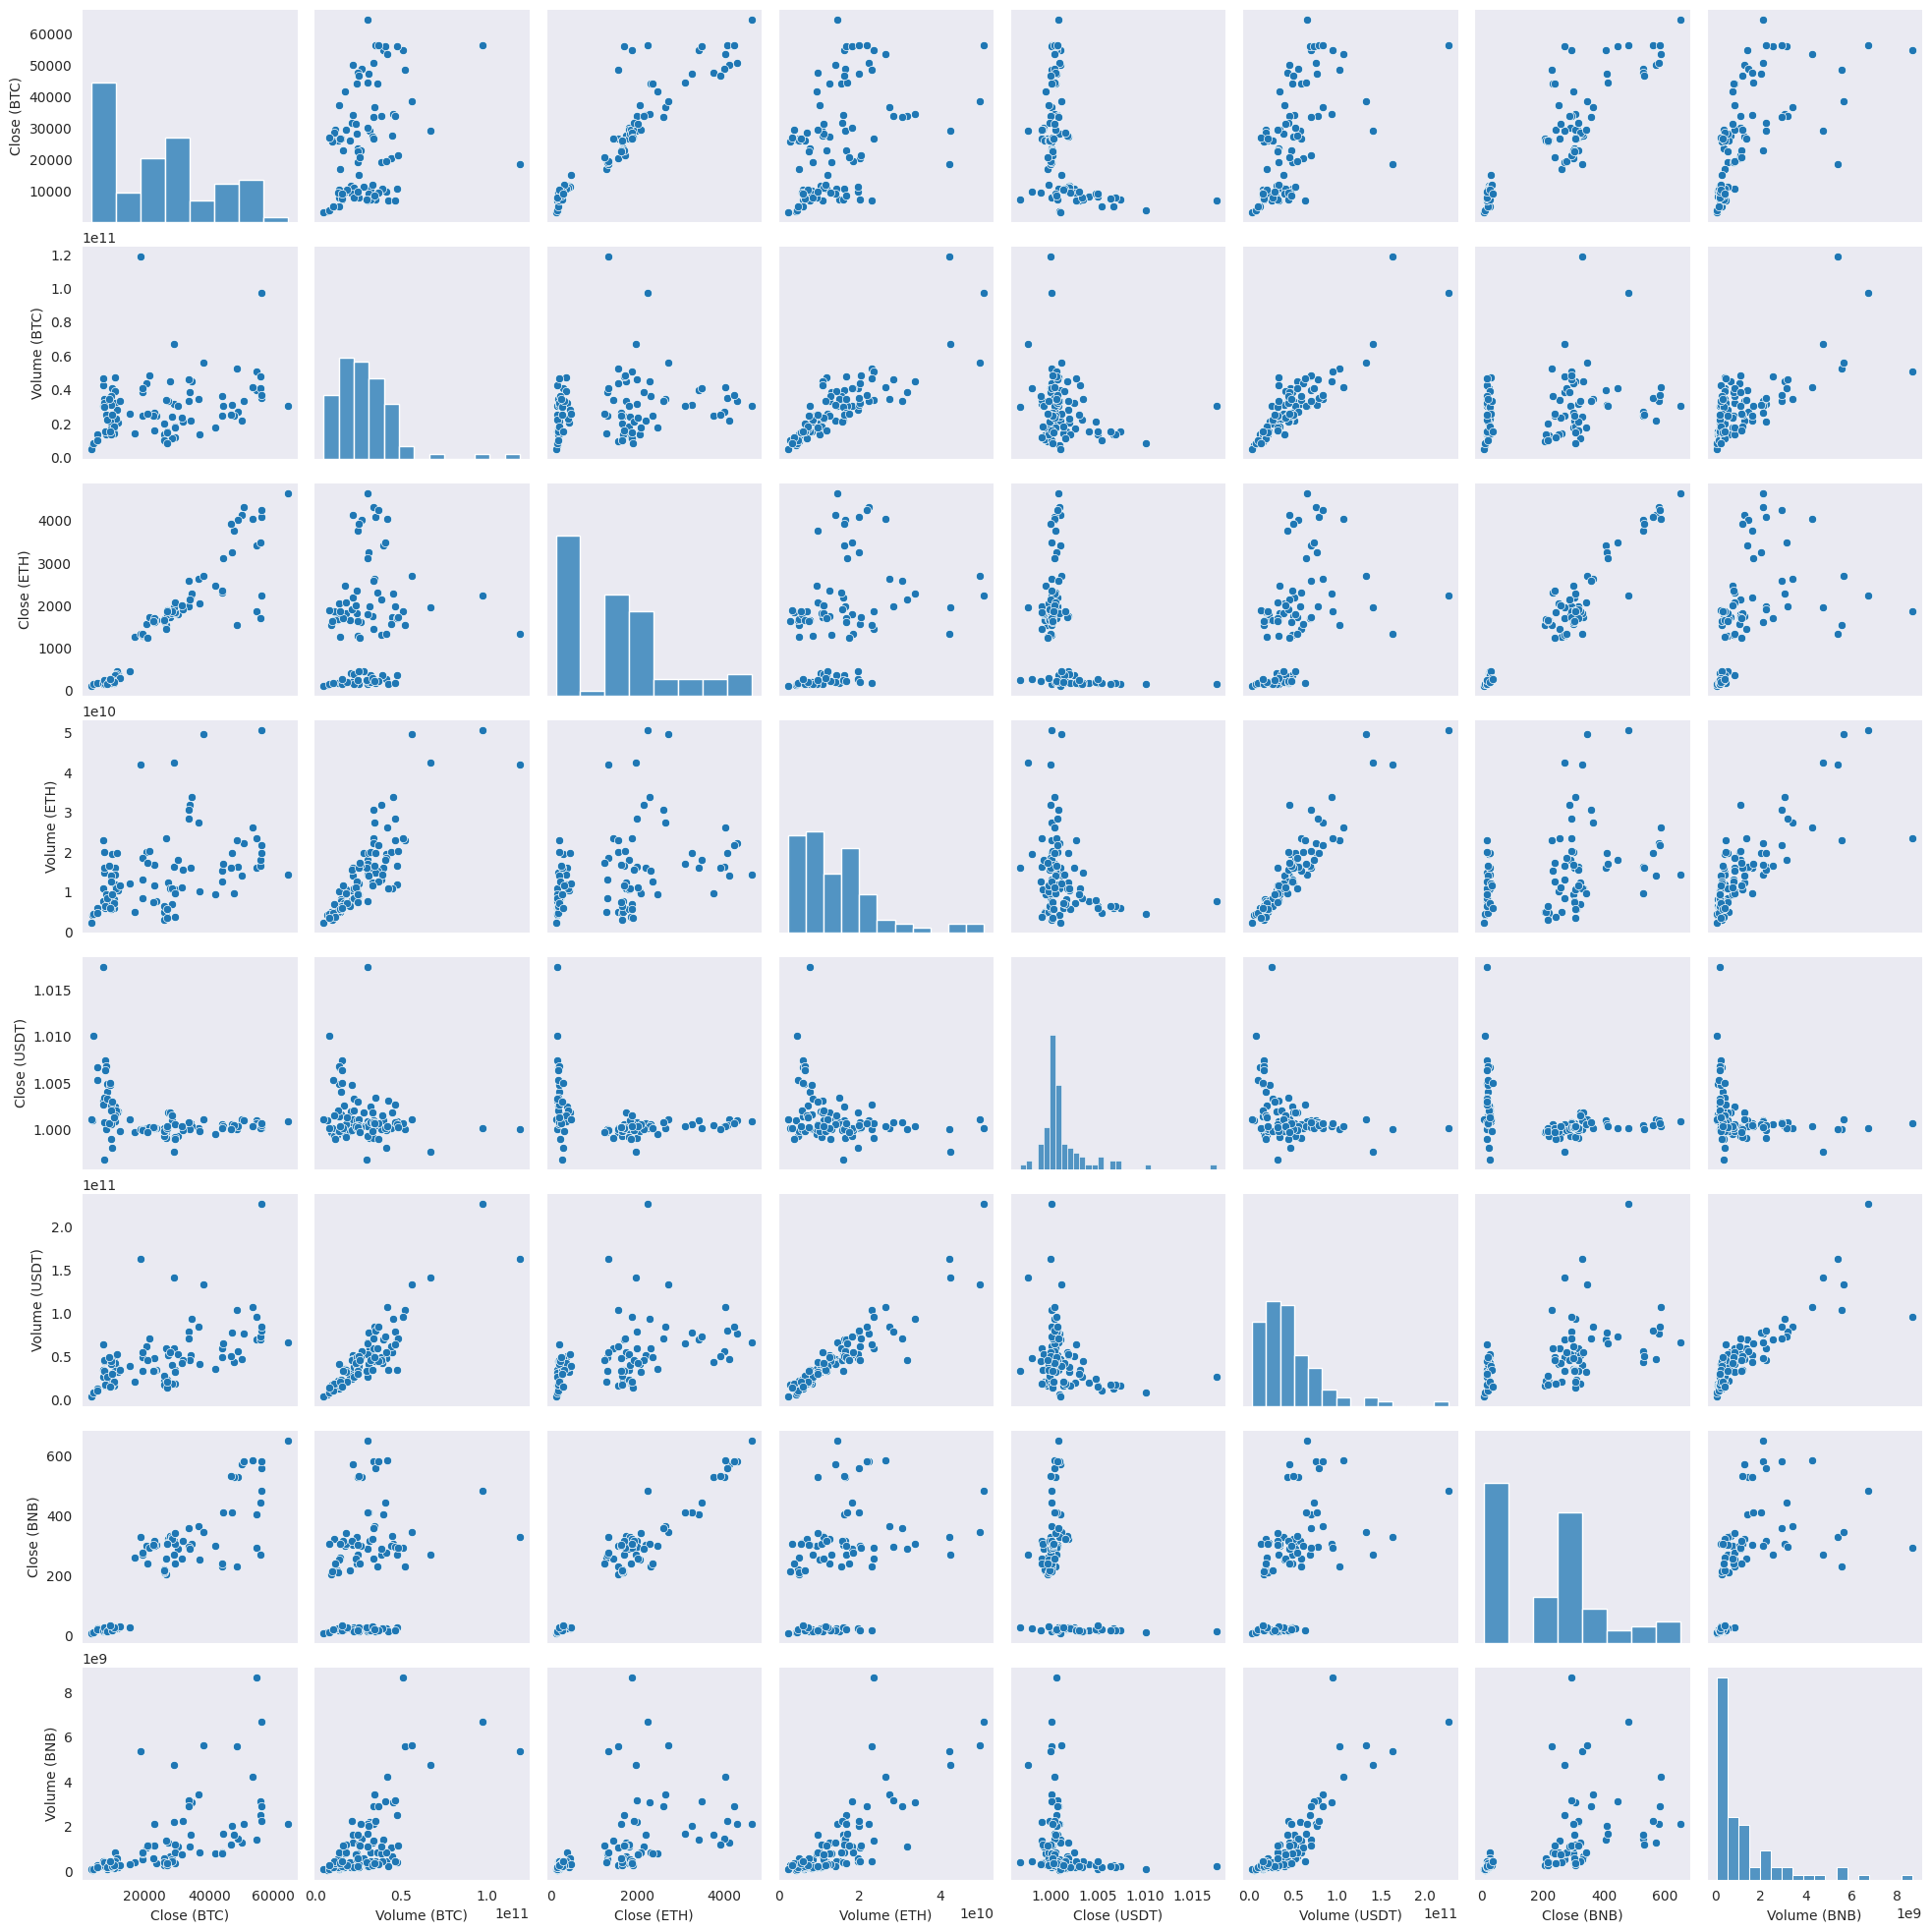

In [ ]:
sns.pairplot(data.sample(n=100));

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=38e4d987467efa9316082d5ae2e438aa3c2452080398f3f537dcdbba744f702e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d017

In [ ]:
!pip install --upgrade typing-extensions


In [ ]:
!pip install --upgrade pydantic


In [ ]:
!pip install --upgrade pandas-profiling


In [ ]:
!pip install --upgrade pydantic


# **Data Pre-Processing**

In [ ]:

X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [ ]:
X.head()

Volume (BTC)  Close (ETH)  Volume (ETH)  \
Date                                                                 
2019-01-17 00:00:00+00:00    5464420383   123.741920    2594091285   
2019-01-18 00:00:00+00:00    5002961727   121.010262    2305389800   
2019-01-19 00:00:00+00:00    5955691380   124.519020    3048261797   
2019-01-20 00:00:00+00:00    5582489560   119.474831    2964108269   
2019-01-21 00:00:00+00:00    5004347059   117.157852    2421720343   

                           Close (USDT)  Volume (USDT)  Close (BNB)  \
Date                                                                  
2019-01-17 00:00:00+00:00      1.017495     4146824182     6.417832   
2019-01-18 00:00:00+00:00      1.017251     3661299223     6.563040   
2019-01-19 00:00:00+00:00      1.016782     3961648844     6.635449   
2019-01-20 00:00:00+00:00      1.017146     4389435191     6.493869   
2019-01-21 00:00:00+00:00      1.013376     3497758658     6.553025   

                           Volume (BNB)  
Date                                     
2019-01-17 00:00:00+00:00      36306127  
2019-01-18 00:00:00+00:00      43105423  
2019-01-19 00:00:00+00:00      46981638  
2019-01-20 00:00:00+00:00      49479090  
2019-01-21 00:00:00+00:00      36321046

In [ ]:
Y.head()

Date
2019-01-17 00:00:00+00:00    3678.563965
2019-01-18 00:00:00+00:00    3657.839355
2019-01-19 00:00:00+00:00    3728.568359
2019-01-20 00:00:00+00:00    3601.013672
2019-01-21 00:00:00+00:00    3576.032471
Name: Close (BTC), dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [ ]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Feature** **Selection**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Baseline Modeling

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

# Evaluation

In [ ]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [ ]:
from tabulate import tabulate

# Assuming you have variables r2neigh, r2rf, r2dt, r2est with your accuracy values
# Debug prints
print("r2neigh:", r2neigh)
print("r2rf:", r2rf)
print("r2dt:", r2dt)
print("r2est:", r2est)

# Create a dictionary to store model names and their corresponding accuracy
models = {
    "K nearest neighbors": r2neigh,
    "Random Forest": r2rf,
    "Decision Tree": r2dt,
    "Gradient Boosting": r2est
}

# Find the model with the highest accuracy
best_model = max(models, key=models.get)
best_accuracy = models[best_model]

# Print the table
table = [
    ["Model", "Accuracy"],
    ["K nearest neighbors", r2neigh],
    ["Random Forest", r2rf],
    ["Decision Tree", r2dt],
    ["Gradient Boosting", r2est]
]
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

# Compare the greatest value and print it out as a sentence
print("\n" + "*"*10 + f" The model with the highest accuracy is {best_model} with accuracy: {best_accuracy} " + "*"*10)


r2neigh: 0.8748327050774659
r2rf: 0.8924561844324922
r2dt: 0.8155133133555192
r2est: 0.8902471558451268
╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ K nearest neighbors │   0.874833 │
├─────────────────────┼────────────┤
│ Random Forest       │   0.892456 │
├─────────────────────┼────────────┤
│ Decision Tree       │   0.815513 │
├─────────────────────┼────────────┤
│ Gradient Boosting   │   0.890247 │
╘═════════════════════╧════════════╛

********** The model with the highest accuracy is Random Forest with accuracy: 0.8924561844324922 **********


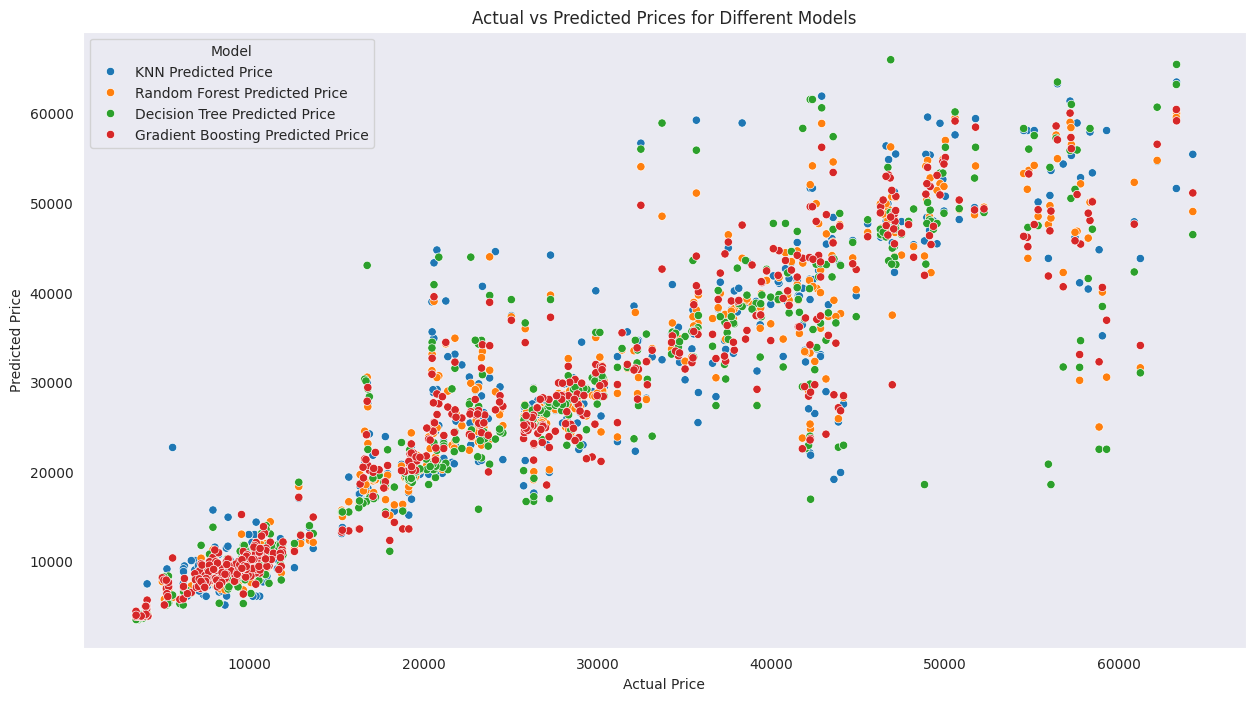

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have variables Y_pred_neigh, Y_pred_rf, Y_pred_dt, Y_pred_est
# and Y_test for actual prices

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Actual Price': Y_test,
    'KNN Predicted Price': Y_pred_neigh,
    'Random Forest Predicted Price': Y_pred_rf,
    'Decision Tree Predicted Price': Y_pred_dt,
    'Gradient Boosting Predicted Price': Y_pred_est
})

# Melt the DataFrame for easier plotting
results_melted = pd.melt(results_df, id_vars='Actual Price', var_name='Model', value_name='Predicted Price')

# Plot the results
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Actual Price', y='Predicted Price', hue='Model', data=results_melted)
plt.title('Actual vs Predicted Prices for Different Models')
plt.show()


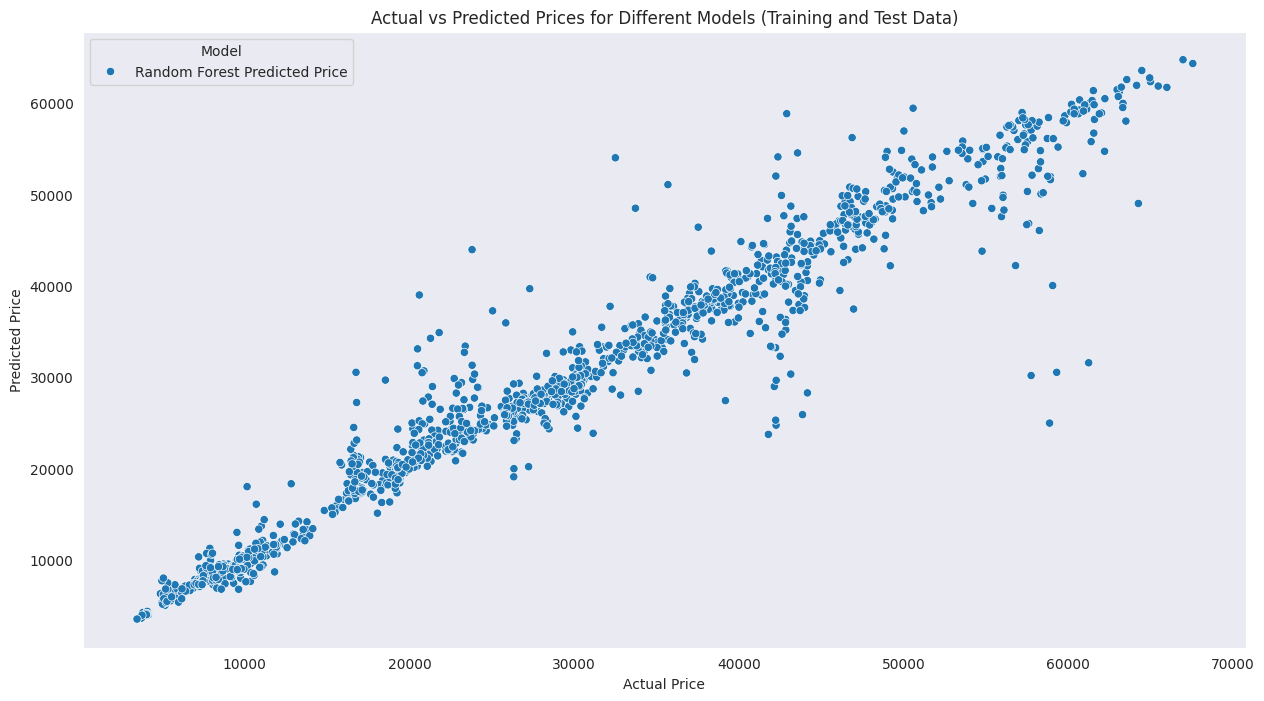

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have variables Y_pred_neigh, Y_pred_rf, Y_pred_dt, Y_pred_est
# and Y_test for actual prices

# Create DataFrames for training and test sets
train_results_df = pd.DataFrame({
    'Actual Price': Y_train,
    'Random Forest Predicted Price': rf.predict(X_train)
})

test_results_df = pd.DataFrame({
    'Actual Price': Y_test,
    'Random Forest Predicted Price': Y_pred_rf
})

# Melt the DataFrames for easier plotting
train_results_melted = pd.melt(train_results_df, id_vars='Actual Price', var_name='Model', value_name='Predicted Price')
test_results_melted = pd.melt(test_results_df, id_vars='Actual Price', var_name='Model', value_name='Predicted Price')

# Concatenate the results for training and test sets
results_melted = pd.concat([train_results_melted, test_results_melted])

# Plot the results
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Actual Price', y='Predicted Price', hue='Model', data=results_melted)
plt.title('Actual vs Predicted Prices for Different Models (Training and Test Data)')
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, confusion_matrix

# Function to prepare the data
def prepare_data(prices):
    # Add a column indicating whether the price increased (1) or decreased (0)
    prices['Price_Up'] = (prices['Close'].shift(-1) > prices['Close']).astype(int)
    # Drop the last row to handle NaN values
    prices = prices.dropna()
    return prices

# Function to train and evaluate the model
def train_and_evaluate(prices):
    # Prepare the data
    prices = prepare_data(prices)

    # Features and target variable
    X = prices[['Close']]
    y = prices['Price_Up']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the model
    model = LogisticRegression(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    f1 = f1_score(y_test, predictions)
    recall = recall_score(y_test, predictions)

    # Print the results
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")

btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
train_and_evaluate(prices1)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
train_and_evaluate(prices2)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
train_and_evaluate(prices3)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
train_and_evaluate(prices4)


Confusion Matrix:
[[182   0]
 [184   0]]
F1 Score: 0.0
Recall: 0.0
Confusion Matrix:
[[ 21 156]
 [ 24 165]]
F1 Score: 0.6470588235294117
Recall: 0.873015873015873
Confusion Matrix:
[[199   0]
 [167   0]]
F1 Score: 0.0
Recall: 0.0
Confusion Matrix:
[[ 10 180]
 [  9 167]]
F1 Score: 0.638623326959847
Recall: 0.9488636363636364


# Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(random_grid.items(), columns=['Parameter', 'Values'])

# Display the DataFrame using tabulate
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤═══════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │ Parameter         │ Values                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   random_state=42)

In [ ]:
rf_random.best_params_

{'n_estimators': 480,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 70,
 'bootstrap': True}

# **Model Evaluation**
# *Performance Analysis*

In [ ]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)
# Create a table
table = [
    ["Model", "Random Forest Regressor"],
    ["Hyperparameters", rf_random.best_params_],
    ["Accuracy", r2rf]
]

# Display the table using tabulate
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Model           │ Random Forest Regressor                                                                                                          │
╞═════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Hyperparameters │ {'n_estimators': 480, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 70, 'bootstrap': True} │
├─────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Accuracy        │ 0.8998075461531784                                                                                                               │
╘═════════════════╧═══════════════════════════════════════════════════════════════════════════

╒════════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Model                          │ Random Forest Regressor                                                                                                          │
╞════════════════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Hyperparameters                │ {'n_estimators': 480, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 70, 'bootstrap': True} │
├────────────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ R-squared (R2)                 │ 0.9006844427317436                                                                                                               │
├───

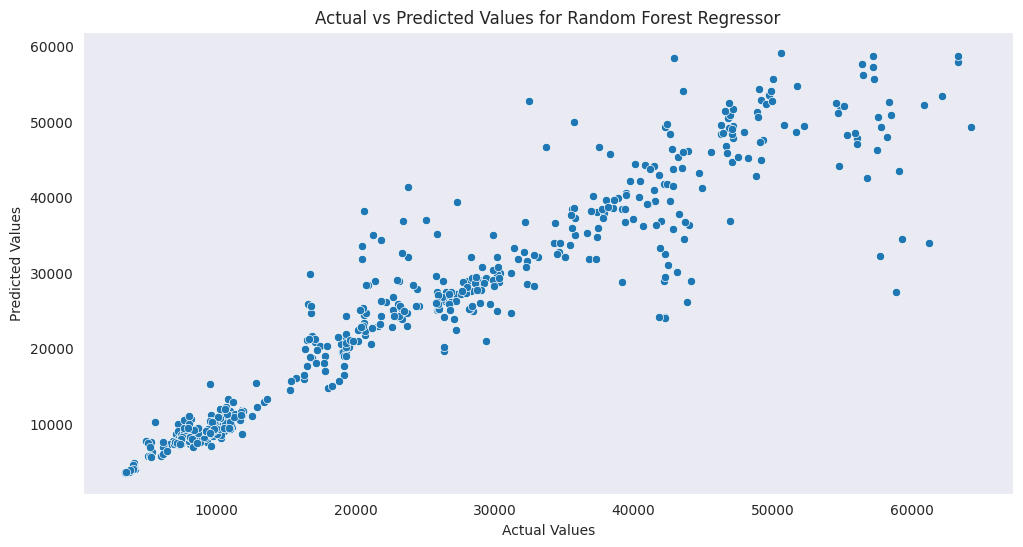

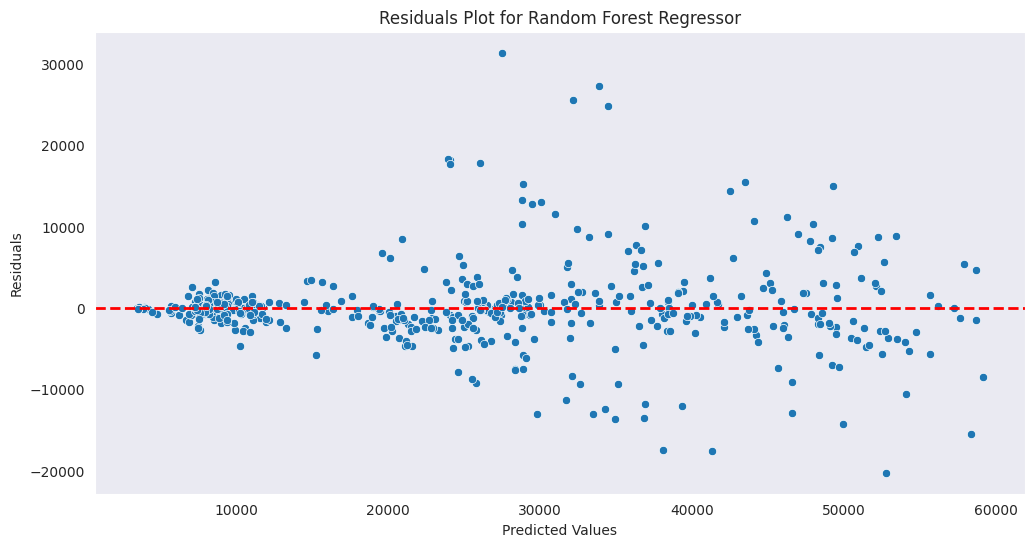

In [ ]:
from tabulate import tabulate
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have variables rf_random, X_train, Y_train, X_test, Y_test

# Train the Random Forest model
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

# Predictions on the test set
Y_pred_rf = rf.predict(X_test)

# Calculate various evaluation metrics
r2_rf = metrics.r2_score(Y_test, Y_pred_rf)
mae_rf = metrics.mean_absolute_error(Y_test, Y_pred_rf)
mse_rf = metrics.mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = metrics.mean_squared_error(Y_test, Y_pred_rf, squared=False)

# Display the results in a table
table = [
    ["Model", "Random Forest Regressor"],
    ["Hyperparameters", rf_random.best_params_],
    ["R-squared (R2)", r2_rf],
    ["Mean Absolute Error (MAE)", mae_rf],
    ["Mean Squared Error (MSE)", mse_rf],
    ["Root Mean Squared Error (RMSE)", rmse_rf]
]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Y_test, y=Y_pred_rf)
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot residuals
residuals = Y_test - Y_pred_rf
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals Plot for Random Forest Regressor')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


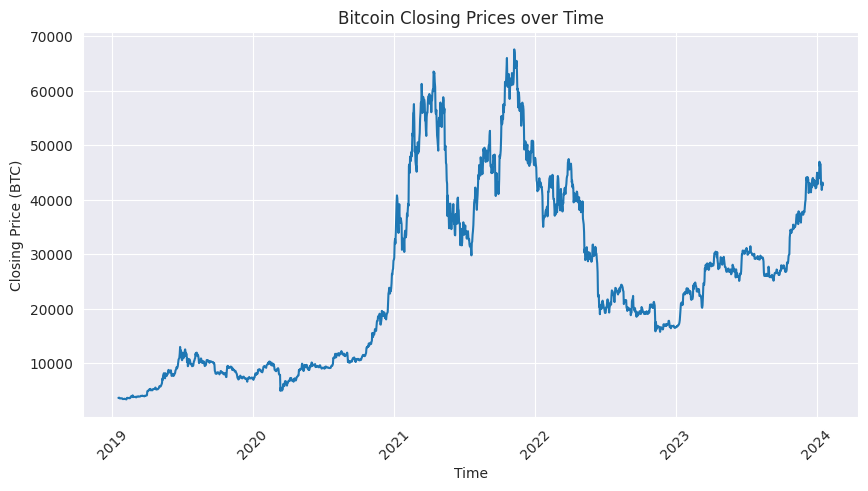

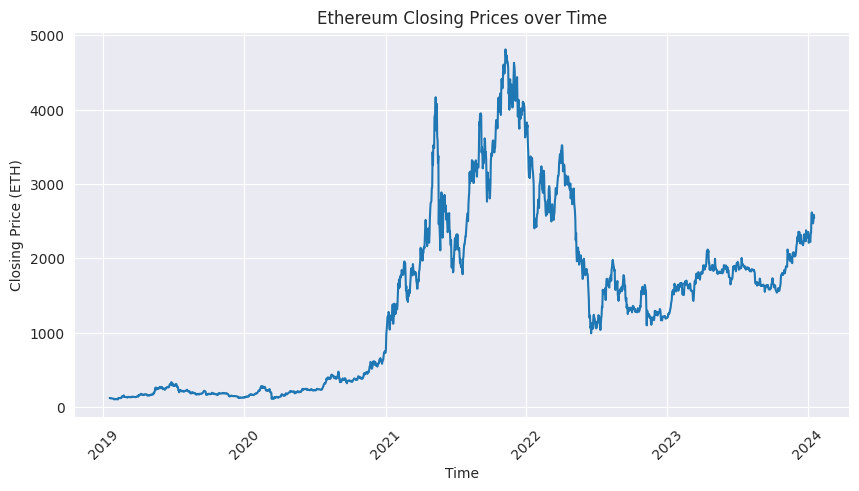

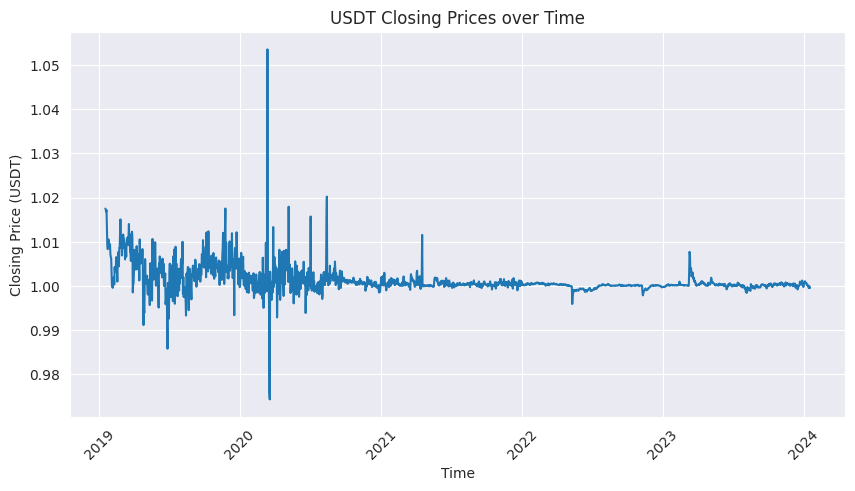

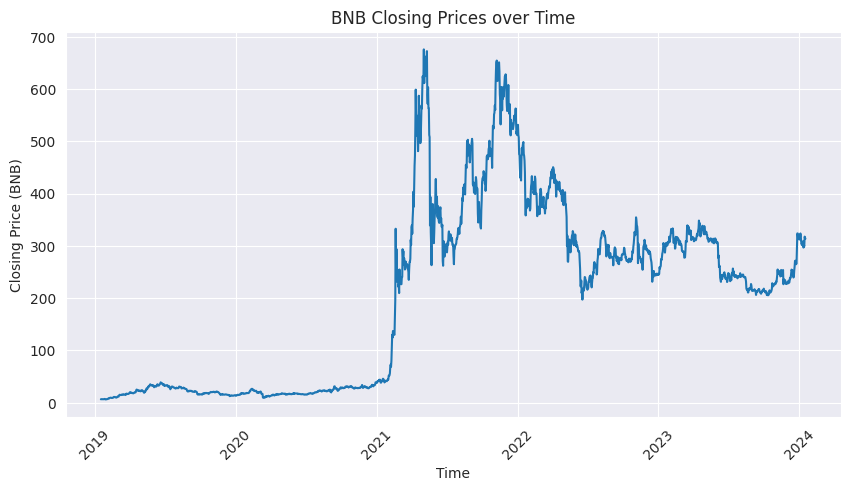

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch historical prices and clean the data
def fetch_and_clean_data(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    prices = ticker.history(period='5y')
    prices.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    return prices

# Fetch and clean historical prices for BTC, ETH, USDT, and BNB
btc_prices = fetch_and_clean_data('BTC-USD')
eth_prices = fetch_and_clean_data('ETH-USD')
usdt_prices = fetch_and_clean_data('USDT-USD')
bnb_prices = fetch_and_clean_data('BNB-USD')

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(btc_prices.index, btc_prices['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price (BTC)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot 2: Line chart of Ethereum closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(eth_prices.index, eth_prices['Close'])
plt.title('Ethereum Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price (ETH)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot 3: Line chart of USDT closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(usdt_prices.index, usdt_prices['Close'])
plt.title('USDT Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price (USDT)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot 4: Line chart of BNB closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(bnb_prices.index, bnb_prices['Close'])
plt.title('BNB Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price (BNB)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


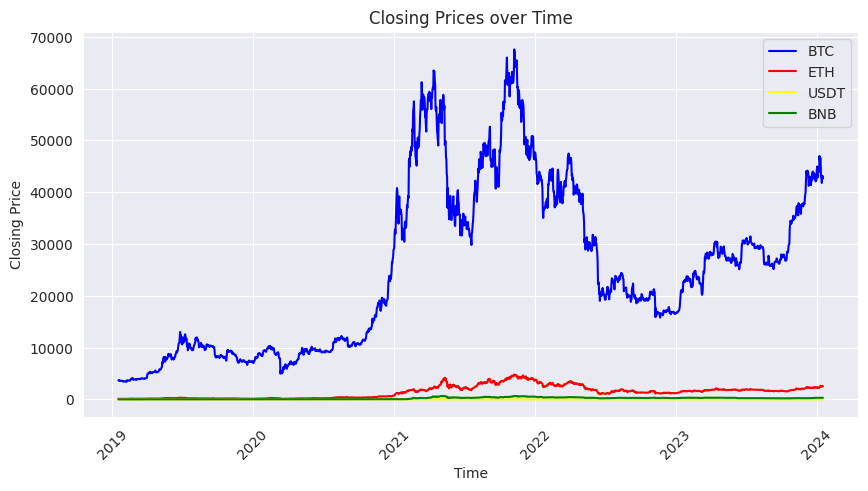

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch historical prices and clean the data
def fetch_and_clean_data(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    prices = ticker.history(period='5y')
    prices.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
    return prices

# Fetch and clean historical prices for BTC, ETH, USDT, and BNB
btc_prices = fetch_and_clean_data('BTC-USD')
eth_prices = fetch_and_clean_data('ETH-USD')
usdt_prices = fetch_and_clean_data('USDT-USD')
bnb_prices = fetch_and_clean_data('BNB-USD')

# Plot all four graphs in one plot with different colors
plt.figure(figsize=(10, 5))
plt.plot(btc_prices.index, btc_prices['Close'], label='BTC', color='blue')
plt.plot(eth_prices.index, eth_prices['Close'], label='ETH', color='red')
plt.plot(usdt_prices.index, usdt_prices['Close'], label='USDT', color='yellow')
plt.plot(bnb_prices.index, bnb_prices['Close'], label='BNB', color='green')

# Add legend
plt.legend()

# Set titles and labels
plt.title('Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Enable grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


# Machine Learning Explainability

In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
import shap



In [ ]:
shap.initjs()

In [ ]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

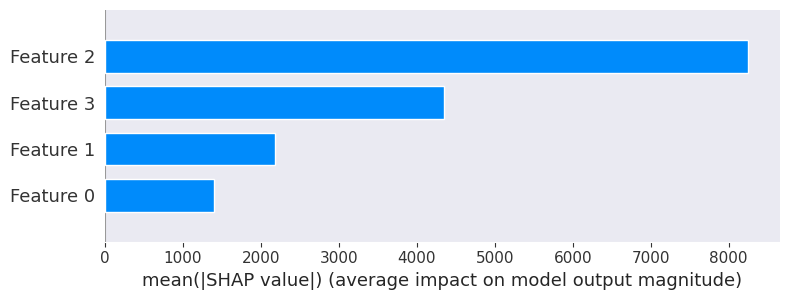

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


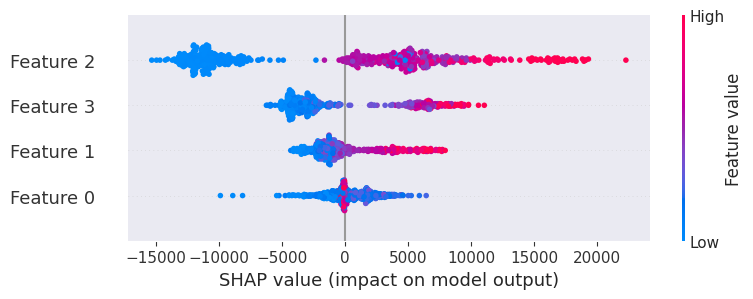

In [ ]:
shap.summary_plot(shap_values, X_test)

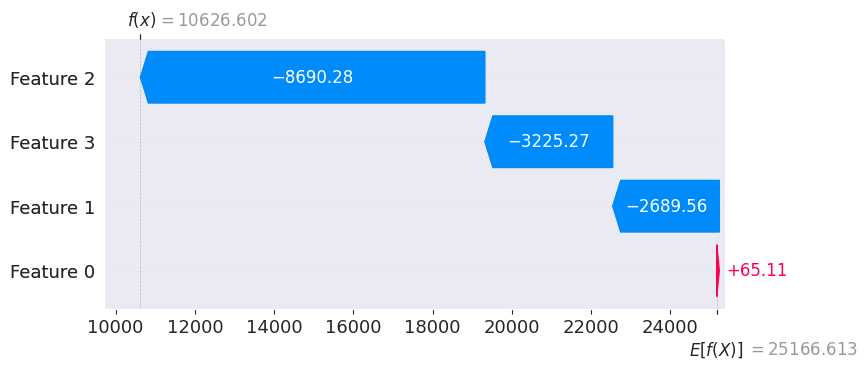

[0.3023888  0.0687159  0.03785495 0.02150356]


In [ ]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf).expected_value[0],
                                       shap_values[row],
                                      )

print(X_test[111])

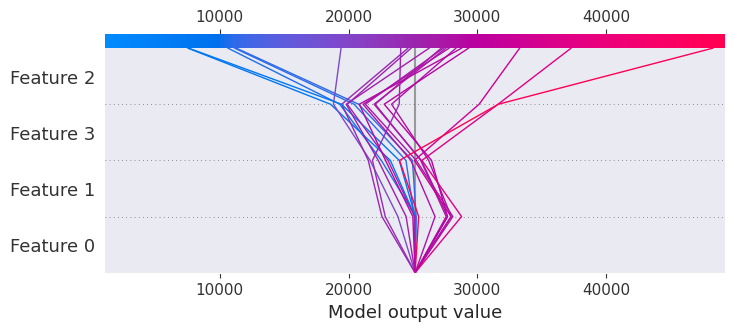

In [ ]:
shap.decision_plot(shap.TreeExplainer(rf).expected_value[0],
                   shap_values[110:130])

# Prediction

In [ ]:
original

Close (BTC)      4.257461e+04
Volume (BTC)     2.436579e+10
Close (ETH)      2.538194e+03
Volume (ETH)     1.153224e+10
Close (USDT)     9.995432e-01
Volume (USDT)    4.309697e+10
Close (BNB)      3.132769e+02
Volume (BNB)     1.177286e+09
Name: 2024-01-17 00:00:00+00:00, dtype: float64

In [ ]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
maindf=pd.read_csv('/content/crypto_data_updated_13_november.csv')

In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1827
Total number of fields present in the dataset:  9


In [ ]:
maindf.shape

(1827, 9)

In [ ]:
maindf.head()

Date  Close (BTC)  Volume (BTC)  Close (ETH)  \
0  2017-11-13 00:00:00+00:00  6559.490234    6263249920   316.716003   
1  2017-11-14 00:00:00+00:00  6635.750000    3197110016   337.631012   
2  2017-11-15 00:00:00+00:00  7315.540039    4200880128   333.356995   
3  2017-11-16 00:00:00+00:00  7871.689941    5123809792   330.924011   
4  2017-11-17 00:00:00+00:00  7708.990234    4651670016   332.394012   

   Volume (ETH)  Close (USDT)  Volume (USDT)  Close (BNB)  Volume (BNB)  
0    1041889984       1.00935      767884032      1.68662      12238800  
1    1069680000       1.00683      429857984      1.59258       7829600  
2     722665984       1.00318      449671008      1.53045       7615500  
3     797254016       1.00212      650278976      1.57792       8928640  
4     621732992       1.00139      639398016      1.51036       8508840

In [ ]:
maindf.tail()

Date   Close (BTC)  Volume (BTC)  Close (ETH)  \
1822  2022-11-09 00:00:00+00:00  15880.780273  102905151606  1100.169800   
1823  2022-11-10 00:00:00+00:00  17586.771484   83202283721  1299.464600   
1824  2022-11-11 00:00:00+00:00  17034.292969   55871616488  1287.221069   
1825  2022-11-12 00:00:00+00:00  16799.185547   29717699419  1255.268311   
1826  2022-11-13 00:00:00+00:00  16550.126953   25153593344  1228.583984   

      Volume (ETH)  Close (USDT)  Volume (USDT)  Close (BNB)  Volume (BNB)  
1822   38864492427      0.998600   143975136007   266.853119    3191459132  
1823   28581002122      0.997835   114807119109   304.080048    2461275687  
1824   20920539099      0.998218    74933538836   289.820557    1625174426  
1825   10964962767      0.998616    40298138489   282.341278    1189401392  
1826    9734809600      0.998950    36130271232   279.073547     904519232

In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1827 non-null   object 
 1   Close (BTC)    1827 non-null   float64
 2   Volume (BTC)   1827 non-null   int64  
 3   Close (ETH)    1827 non-null   float64
 4   Volume (ETH)   1827 non-null   int64  
 5   Close (USDT)   1827 non-null   float64
 6   Volume (USDT)  1827 non-null   int64  
 7   Close (BNB)    1827 non-null   float64
 8   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 128.6+ KB


In [ ]:
maindf.describe()

Close (BTC)  Volume (BTC)  Close (ETH)  Volume (ETH)  Close (USDT)  \
count   1827.000000  1.827000e+03  1827.000000  1.827000e+03   1827.000000   
mean   20228.315369  2.630272e+10  1129.229883  1.308885e+10      1.001606   
std    17028.454586  1.995516e+10  1203.999710  1.086878e+10      0.005771   
min     3236.761719  2.923670e+09    84.308296  6.217330e+08      0.966644   
25%     7666.110107  1.082725e+10   208.977219  4.495085e+09      0.999988   
50%    10793.339844  2.399141e+10   474.911011  1.095112e+10      1.000508   
75%    33734.515625  3.563229e+10  1802.761414  1.836356e+10      1.002518   
max    67566.828125  3.509679e+11  4812.087402  8.448291e+10      1.077880   

       Volume (USDT)  Close (BNB)  Volume (BNB)  
count   1.827000e+03  1827.000000  1.827000e+03  
mean    4.156009e+10   143.886168  9.717711e+08  
std     3.842981e+10   184.167061  1.452963e+09  
min     4.298580e+08     1.510360  9.284000e+03  
25%     6.042266e+09    14.114409  1.360422e+08  
50%     3.639024e+10    23.811028  3.480300e+08  
75%     6.090617e+10   293.938461  1.410656e+09  
max     2.790675e+11   675.684082  1.798295e+10

## Checking for Null Values

In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [ ]:
maindf.shape

(1827, 9)

### EDA(Exploratory Data Analysis)

In [ ]:
sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2017-11-13 00:00:00+00:00
Ending Date 2022-11-13 00:00:00+00:00


### StockPrice Analysis from Start


### Analysis of Year 2019

In [ ]:
import pandas as pd

# Assuming maindf is your DataFrame
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

# Select data for the year 2019
y_2019 = maindf.loc[(maindf['Date'] >= '2019-11-13') & (maindf['Date'] < '2019-12-31')]
# Drop 'Adj Close' and 'Volume' columns
columns_to_drop = ['Close (ETH)', 'Volume (ETH)',
                    'Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)']

y_2019.drop(columns_to_drop, axis=1, inplace=True)

# The rest of your code goes here or use y_2019 for further analysis



In [ ]:
print(y_2019.columns)


Index(['Date', 'Close (BTC)', 'Volume (BTC)'], dtype='object')


In [ ]:
y_2019.columns = y_2019.columns.str.strip()


In [ ]:
print(y_2019.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 730 to 777
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          48 non-null     datetime64[ns, UTC]
 1   Close (BTC)   48 non-null     float64            
 2   Volume (BTC)  48 non-null     int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 1.5 KB
None


In [ ]:
monthwise = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Close (BTC)', 'Volume (BTC)']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise


Close (BTC)  Volume (BTC)
Date                                
January            NaN           NaN
February           NaN           NaN
March              NaN           NaN
April              NaN           NaN
May                NaN           NaN
June               NaN           NaN
July               NaN           NaN
August             NaN           NaN
September          NaN           NaN
October            NaN           NaN
November   7875.276394  2.271900e+10
December   7287.026839  2.042075e+10

In [ ]:
import plotly.graph_objects as go

# Assuming you already have the 'monthwise' DataFrame
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,  # Corrected variable name from 'monthvise' to 'monthwise'
    y=monthwise['Close (BTC)'],  # Assuming you have a column named 'Close (BTC)'
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Volume (BTC)'],  # Assuming you have a column named 'Volume (BTC)'
    name='Stock Volume',
    marker_color='lightblue'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparison between Stock close price and volume')
fig.show()


In [ ]:
import plotly.graph_objects as go

# Assuming you already have the 'y_2019' DataFrame
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']

# Correct column names based on your actual DataFrame
monthwise_high = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Close (BTC)'].max()
monthwise_high = monthwise_high.reindex(new_order, axis=0)

monthwise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Volume (BTC)'].min()
monthwise_low = monthwise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Stock Close Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Stock Volume',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title='Monthwise Close Stock Price vs Volume')
fig.show()


In [ ]:
from itertools import cycle
import plotly.express as px

# Assuming you already have the 'y_2019' DataFrame
names = cycle(['Stock Close Price', 'Stock Volume'])

fig = px.line(y_2019, x='Date', y=['Close (BTC)', 'Volume (BTC)'],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(title_text='Stock Analysis Chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()




### Analysis of Year 2020

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01') & (maindf['Date'] < '2021-01-01')]
columns_to_drop = ['Close (ETH)', 'Volume (ETH)', 'Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)']

# Corrected line
y_2020.drop(columns=columns_to_drop, axis=1, inplace=True)


In [ ]:
monthwise = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Close (BTC)', 'Volume (BTC)']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise


Close (BTC)  Volume (BTC)
Date                                 
January     8389.270476  2.751201e+10
February    9630.722185  4.011643e+10
March       6871.016113  4.162716e+10
April       7224.477327  3.853757e+10
May         9263.151745  4.149575e+10
June        9489.227214  2.169711e+10
July        9589.899729  1.760688e+10
August     11652.394185  2.285087e+10
September  10660.276855  3.586498e+10
October    11886.978201  3.389918e+10
November   16645.757422  3.643816e+10
December   21983.137097  3.910515e+10

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close (BTC)'],
    name='Stock Close Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Volume (BTC)'],
    name='Stock Volume',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparison between Stock open and close price')
fig.show()


In [ ]:
monthwise_high = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Close (BTC)'].max()
monthwise_high = monthwise_high.reindex(new_order, axis=0)

monthwise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Volume (BTC)'].min()
monthwise_low = monthwise_low.reindex(new_order, axis=0)
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthwise_high.index,
    y=monthwise_high,
    name='Stock Close Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthwise_low.index,
    y=monthwise_low,
    name='Stock Volume ',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise Close price vs volume')
fig.show()

In [ ]:
from itertools import cycle
import plotly.express as px

# Assuming you already have the 'y_2020' DataFrame
names = cycle(['Stock Close Price', 'Stock Volume'])

fig = px.line(y_2020, x='Date', y=['Close (BTC)', 'Volume (BTC)'],
              labels={'Date': 'Date', 'value': 'Stock value'})
fig.update_layout(title_text='Stock Analysis Chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t: t.update(name=next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Analysis of Year 2021

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01') & (maindf['Date'] < '2021-12-31')]
columns_to_drop = ['Close (ETH)', 'Volume (ETH)', 'Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)']

# Corrected line
y_2021.drop(columns=columns_to_drop, axis=1, inplace=True)

# Corrected grouping logic
monthwise = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Close (BTC)', 'Volume (BTC)']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)

# Print the resulting DataFrame
print(monthwise)


            Close (BTC)  Volume (BTC)
Date                                 
January    34761.649950  6.946688e+10
February   46306.798968  8.096975e+10
March      54998.008695  5.423175e+10
April      57206.720052  6.148273e+10
May        46443.286668  6.376108e+10
June       35845.154687  3.965492e+10
July       34444.973790  2.642269e+10
August     45709.022681  3.273143e+10
September  45939.771484  3.673799e+10
October    57911.970514  3.719606e+10
November   60621.488802  3.510901e+10
December   49361.767969  3.066910e+10


In [ ]:
print(y_2021[['Close (BTC)', 'Volume (BTC)']].isnull().sum())


Close (BTC)     0
Volume (BTC)    0
dtype: int64


In [ ]:
print(y_2021.head())


                          Date   Close (BTC)  Volume (BTC)
1145 2021-01-01 00:00:00+00:00  29374.152344   40730301359
1146 2021-01-02 00:00:00+00:00  32127.267578   67865420765
1147 2021-01-03 00:00:00+00:00  32782.023438   78665235202
1148 2021-01-04 00:00:00+00:00  31971.914062   81163475344
1149 2021-01-05 00:00:00+00:00  33992.429688   67547324782


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close (BTC)'],
    name='Stock Close Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Volume (BTC)'],
    name='Stock Volume',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock close price vs volume')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Close (BTC)'], y_2021['Volume (BTC)'],
                                          y_2021['Close (BTC)'], y_2021['Volume (BTC)']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


### Analysis of Year 2022

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2022-01-01') & (maindf['Date'] < '2022-12-31')]
columns_to_drop = ['Close (ETH)', 'Volume (ETH)', 'Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)']

# Corrected line
y_2022.drop(columns=columns_to_drop, axis=1, inplace=True)

# Corrected grouping logic
monthwise = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Close (BTC)', 'Volume (BTC)']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)

# Print the resulting DataFrame
print(monthwise)


            Close (BTC)  Volume (BTC)
Date                                 
January    41114.422379  2.980578e+10
February   40763.474051  2.397629e+10
March      41966.237525  2.680464e+10
April      41435.319661  2.767053e+10
May        31706.105217  3.566740e+10
June       24383.685482  3.079797e+10
July       21539.253843  2.992201e+10
August     22366.266318  2.884492e+10
September  19804.779232  3.744241e+10
October    19650.525643  3.090011e+10
November   19015.878380  5.730426e+10
December            NaN           NaN


In [ ]:

print(y_2022.head())

                          Date   Close (BTC)  Volume (BTC)
1510 2022-01-01 00:00:00+00:00  47686.812500   24582667004
1511 2022-01-02 00:00:00+00:00  47345.218750   27951569547
1512 2022-01-03 00:00:00+00:00  46458.117188   33071628362
1513 2022-01-04 00:00:00+00:00  45897.574219   42494677905
1514 2022-01-05 00:00:00+00:00  43569.003906   36851084859


In [ ]:
print(y_2022[['Close (BTC)', 'Volume (BTC)']].isnull().sum())

Close (BTC)     0
Volume (BTC)    0
dtype: int64


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close (BTC)'],
    name='Stock Close Price',
    marker_color='brown'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Volume (BTC)'],
    name='Stock Volume',
    marker_color='yellow'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock close price vs volume')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Close (BTC)'], y_2022['Volume (BTC)'],
                                          y_2022['Close (BTC)'], y_2022['Volume (BTC)']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


# **Overall Analysis 2019-22**

In [ ]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2019-11-13')
                     & (maindf['Date'] <= '2022-12-31')]


columns_to_drop = ['Close (ETH)', 'Volume (ETH)',
                    'Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)']

y_overall.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
monthwise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Close (BTC)','Volume (BTC)']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

Close (BTC)  Volume (BTC)
Date                                 
January    28088.447602  4.226156e+10
February   31967.748093  4.825724e+10
March      34611.754111  4.088785e+10
April      35288.839014  4.256361e+10
May        29137.514543  4.697474e+10
June       23239.355794  3.071667e+10
July       21858.042454  2.465053e+10
August     26575.894395  2.814241e+10
September  25468.275857  3.668179e+10
October    29816.491452  3.399845e+10
November   29747.019569  3.626717e+10
December   26176.786437  3.014083e+10

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Line(x=y_2019['Date'], y=y_2022['Close (BTC)'], name='Close (BTC)'))
fig.add_trace(go.Line(x=y_2019['Date'], y=y_2022['Volume (BTC)'], name='Volume (BTC)'))

fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black', legend_title_text='Stock Parameters')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Close (BTC)'], y_overall['Volume (BTC)'],
                                          y_overall['Close (BTC)'], y_overall['Volume (BTC)']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building LSTM Model

In [ ]:
closedf = maindf[['Date','Close (BTC)']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1827, 2)


In [ ]:
print(maindf.columns)


Index(['Date', 'Close (BTC)', 'Volume (BTC)', 'Close (ETH)', 'Volume (ETH)',
       'Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'],
      dtype='object')


In [ ]:
import plotly.express as px

fig = px.line(closedf, x='Date', y='Close (BTC)', labels={'Date': 'Date', 'Close (BTC)': 'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2019-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
print(closedf.columns)


Index(['Date', 'Close (BTC)'], dtype='object')


In [ ]:
closedf = closedf[closedf['Date'] > '2022-03-02']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  256


In [ ]:
closedf

Date   Close (BTC)
1560 2022-02-20 00:00:00+00:00  38431.378906
1561 2022-02-21 00:00:00+00:00  37075.281250
1562 2022-02-22 00:00:00+00:00  38286.027344
1563 2022-02-23 00:00:00+00:00  37296.570312
1564 2022-02-24 00:00:00+00:00  38332.609375
...                        ...           ...
1822 2022-11-09 00:00:00+00:00  15880.780273
1823 2022-11-10 00:00:00+00:00  17586.771484
1824 2022-11-11 00:00:00+00:00  17034.292969
1825 2022-11-12 00:00:00+00:00  16799.185547
1826 2022-11-13 00:00:00+00:00  16550.126953

[267 rows x 2 columns]

In [ ]:
# Build an example LSTM model (replace this with your actual model architecture)
model = Sequential()
model.add(LSTM(units=50, input_shape=(15, 1)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
4/4 [==============================] - 3s 202ms/step - loss: 0.6922 - accuracy: 0.0087 - val_loss: 0.7163 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 24ms/step - loss: 0.6670 - accuracy: 0.0087 - val_loss: 0.7435 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 24ms/step - loss: 0.6502 - accuracy: 0.0087 - val_loss: 0.7695 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 26ms/step - loss: 0.6448 - accuracy: 0.0087 - val_loss: 0.7862 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 0.6413 - accuracy: 0.0087 - val_loss: 0.7739 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6368 - accuracy: 0.0087 - val_loss: 0.7548 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 21ms/step - loss: 0.6323 - accuracy: 0.0087 - val_loss: 0.7335 - val_accuracy: 0.0000e+0

In [ ]:
import plotly.express as px

fig = px.line(closedf, x='Date', y='Close (BTC)', labels={'Date': 'Date', 'Close (BTC)': 'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


## Normalization

In [ ]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(256, 1)


In [ ]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (153, 1)
test_data:  (103, 1)


 *Transform the Close price based on Time-series-a*nalysis forecasting requirement

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (137, 15)
y_train:  (137,)
X_test:  (87, 15)
y_test (87,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (137, 15, 1)
X_test:  (87, 15, 1)


## **Actual Model Building**

In [ ]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
5/5 [==============================] - 2s 81ms/step - loss: 0.2587 - val_loss: 0.0108
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 0.2384 - val_loss: 0.0081
Epoch 3/200
5/5 [==============================] - 0s 17ms/step - loss: 0.2184 - val_loss: 0.0058
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1989 - val_loss: 0.0037
Epoch 5/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1799 - val_loss: 0.0022
Epoch 6/200
5/5 [==============================] - 0s 20ms/step - loss: 0.1605 - val_loss: 0.0013
Epoch 7/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1397 - val_loss: 0.0013
Epoch 8/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1178 - val_loss: 0.0029
Epoch 9/200
5/5 [==============================] - 0s 18ms/step - loss: 0.0955 - val_loss: 0.0059
Epoch 10/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0751 - val_loss: 0.0106
Epoch 11/200
5/5 [=

### Plotting Loss vs Validation loss

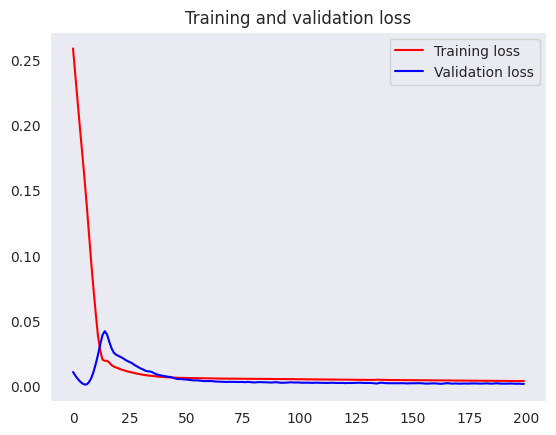

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
###the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 4ms/step


((137, 1), (87, 1))

### Model Evaluation


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
## Evaluation metrices RMSE, MSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1966.4245096825548
Train data MSE:  3866825.352280276
Train data MAE:  1518.6048984945255
-------------------------------------------------------------------------------------
Test data RMSE:  1328.330895728776
Test data MSE:  1764462.9685476127
Test data MAE:  1096.2930473239942


In [ ]:
## Variance Regression Score
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9526145625931909
Test data explained variance regression score: 0.3563320170553659


In [ ]:
## R square score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.952430164838636
Test data R2 score: -0.3961277889758581


In [ ]:
## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.004323405890421537
Test data MGD:  0.004396993380001601
----------------------------------------------------------------------
Train data MPD:  125.00314676704359
Test data MPD:  87.92991390850587


In [ ]:
# Comparision of original stock close price and predicted close price


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close (BTC)'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (256, 1)
Test predicted data:  (256, 1)


### **PREDICTING NEXT 30 DAYS**

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
# Plotting last 15 days of dataset and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [ ]:
# Plotting entire Closing Stock Price with next 30 days period of prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()